### Importação dos dados



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Add a 'loja' column to each dataframe
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

# Concatenate the dataframes
base = pd.concat([loja, loja2, loja3, loja4])

loja.head()

import pandas as pd

urls = [
    ("loja_1", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"),
    ("loja_2", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"),
    ("loja_3", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"),
    ("loja_4", "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"),
]

dfs = []
for nome, url in urls:
    df = pd.read_csv(url, parse_dates=["Data da Compra"])
    df["loja"] = nome
    # garante tipos numéricos
    for col in ["Preço", "Frete", "Avaliação da compra", "Quantidade de parcelas", "lat", "lon"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    dfs.append(df)

base = pd.concat(dfs, ignore_index=True)
base.info()        # checar tipos
base.head(3)       # amostra
base["loja"].value_counts()  # linhas por loja


/tmp/ipython-input-2682535863.py:35: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(url, parse_dates=["Data da Compra"])
/tmp/ipython-input-2682535863.py:35: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(url, parse_dates=["Data da Compra"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  loja                    9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


,count
loja,
loja_1,2359
loja_2,2359
loja_3,2359
loja_4,2358


#1. Análise do faturamento


In [13]:
# Receita = Preço (+ Frete). Se quiser SEM frete, comente a linha que soma o frete.
col_preco = "Preço" if "Preço" in base.columns else "preco"
col_frete = "Frete" if "Frete" in base.columns else "frete"
col_data  = "Data da Compra" if "Data da Compra" in base.columns else "data_da_compra"

base["_receita"] = base[col_preco].fillna(0)
if col_frete in base.columns:
    base["_receita"] = base["_receita"] + base[col_frete].fillna(0)

fat_por_loja = (
    base.groupby("loja")["_receita"]
        .sum()
        .round(2)
        .sort_values(ascending=False)
)
display(fat_por_loja.to_frame("faturamento_total"))


,faturamento_total
loja,
loja_1,1616347.09
loja_2,1567773.22
loja_3,1542047.69
loja_4,1458253.46


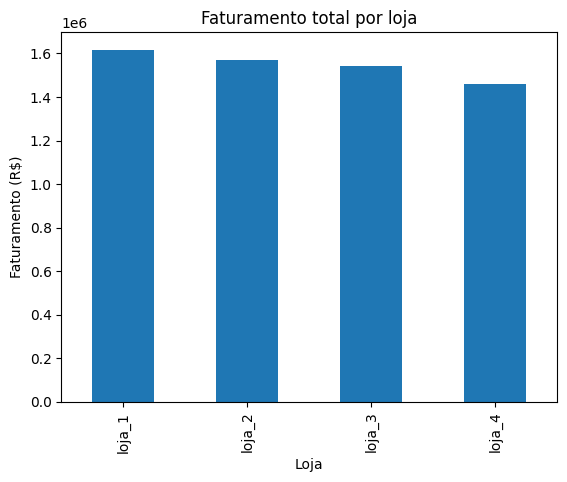

In [14]:
import matplotlib.pyplot as plt

fat_por_loja.plot(kind="bar")
plt.title("Faturamento total por loja")
plt.xlabel("Loja"); plt.ylabel("Faturamento (R$)")
plt.show()


# 2. Vendas por Categoria


In [15]:
col_cat  = "Categoria do Produto" if "Categoria do Produto" in base.columns else "categoria_do_produto"

vendas_cat = base.groupby(col_cat).size().sort_values(ascending=False)
display(vendas_cat.head(10).to_frame("qtd_vendas"))


,qtd_vendas
Categoria do Produto,
moveis,1886
eletronicos,1772
brinquedos,1290
eletrodomesticos,1149
esporte e lazer,1113
instrumentos musicais,753
livros,742
utilidades domesticas,730


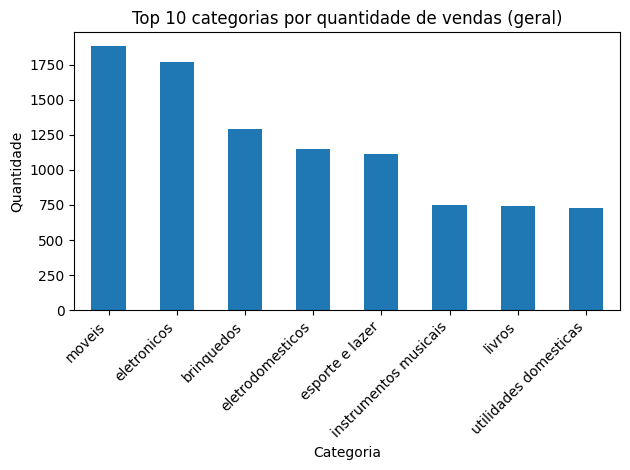

In [16]:
vendas_cat.head(10).plot(kind="bar")
plt.title("Top 10 categorias por quantidade de vendas (geral)")
plt.xlabel("Categoria"); plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [7]:
# Média de avaliação por loja (tabela)
import matplotlib.pyplot as plt

col_ava = "Avaliação da compra" if "Avaliação da compra" in base.columns else "avaliacao_da_compra"

medias_avaliacao = (
    base.groupby("loja")[col_ava]
        .mean()
        .round(2)
        .sort_values(ascending=False)
)
display(medias_avaliacao.to_frame("media_avaliacao"))


,media_avaliacao
loja,
loja_3,4.05
loja_2,4.04
loja_4,4.00
loja_1,3.98


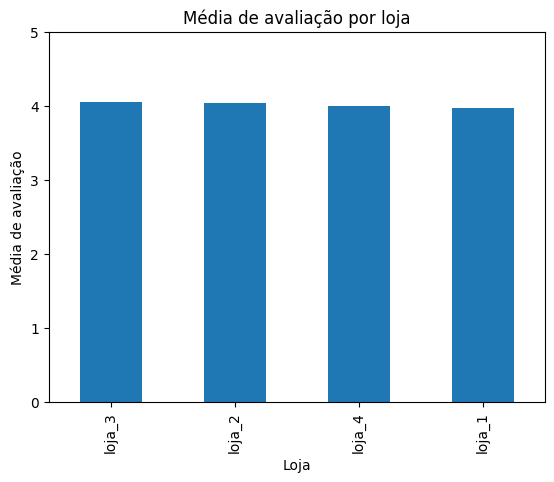

In [8]:
# Gráfico de barras da média de avaliação
medias_avaliacao.plot(kind="bar")
plt.title("Média de avaliação por loja")
plt.xlabel("Loja")
plt.ylabel("Média de avaliação")
plt.ylim(0, 5)
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [9]:
# Top e bottom (geral) + Top 5 por loja
col_prod = "Produto" if "Produto" in base.columns else "produto"

vendas_prod = base.groupby(col_prod).size().sort_values(ascending=False)

top10  = vendas_prod.head(10).to_frame("qtde_vendida")
bottom10 = vendas_prod.tail(10).to_frame("qtde_vendida")  # menos vendidos

display(top10)
display(bottom10)

# Top 5 por loja
por_loja = (
    base.groupby(["loja", col_prod])
        .size()
        .reset_index(name="qtd")
        .sort_values(["loja","qtd"], ascending=[True, False])
        .groupby("loja")
        .head(5)
)
display(por_loja)


,qtde_vendida
Produto,
Cômoda,210
Carrinho controle remoto,206
Micro-ondas,206
Bateria,203
Cama king,201
Jogo de panelas,200
Modelagem preditiva,200
Secadora de roupas,200
Blocos de montar,199


,qtde_vendida
Produto,
Smartwatch,172
Panela de pressão,172
Jogo de copos,169
Poltrona,168
Assistente virtual,167
Ciência de dados com python,166
Guitarra,165
Mochila,163
Headset,158


,loja,Produto,qtd
24,loja_1,Guarda roupas,60
37,loja_1,Micro-ondas,60
47,loja_1,TV Led UHD 4K,60
43,loja_1,Secadora de roupas,58
3,loja_1,Blocos de montar,56
79,loja_2,Iniciando em programação,65
88,loja_2,Micro-ondas,62
52,loja_2,Bateria,61
91,loja_2,Pandeiro,58
100,loja_2,Violão,58


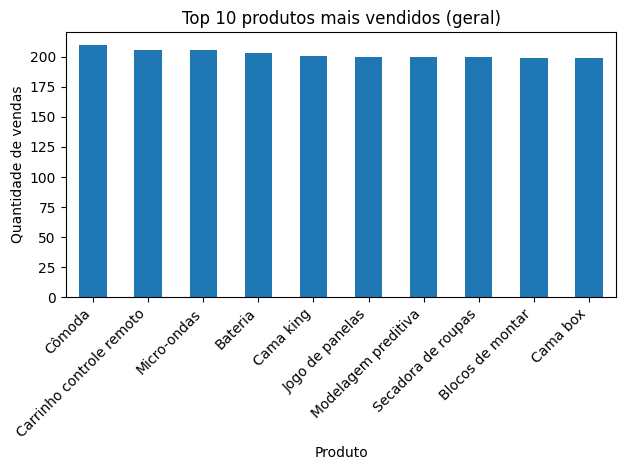

In [10]:
# Gráfico: Top 10 produtos mais vendidos (geral)
top10["qtde_vendida"].plot(kind="bar")
plt.title("Top 10 produtos mais vendidos (geral)")
plt.xlabel("Produto")
plt.ylabel("Quantidade de vendas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [11]:
# Frete médio por loja (tabela)
col_frete = "Frete" if "Frete" in base.columns else "frete"

frete_medio = (
    base.groupby("loja")[col_frete]
        .mean()
        .round(2)
        .sort_values()
)
display(frete_medio.to_frame("frete_medio"))


,frete_medio
loja,
loja_4,31.28
loja_3,33.07
loja_2,33.62
loja_1,34.69


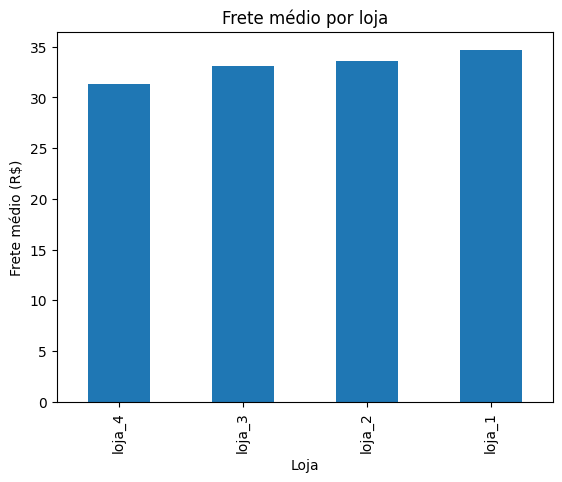

In [12]:
# Gráfico: frete médio por loja
frete_medio.plot(kind="bar")
plt.title("Frete médio por loja")
plt.xlabel("Loja")
plt.ylabel("Frete médio (R$)")
plt.show()


Relatório — Desafio Alura Store

Objetivo. Indicar qual loja o Sr. João deve vender com base em desempenho de vendas (faturamento), categorias, avaliação dos clientes, produtos e frete.

Base analisada. 9.435 registros (≈2,36k por loja). Datas carregadas no formato dia/mês/ano (dayfirst=True recomendado no read_csv).

1) Faturamento total por loja

loja_1: R$ 1.616.347,09

loja_2: R$ 1.567.773,22

loja_3: R$ 1.542.047,69

loja_4: R$ 1.458.253,46 (menor)

Leitura. A loja_4 apresenta o pior faturamento entre as quatro.

2) Vendas por categorias (quantidade, Top 8)

móveis (1.886)

eletrônicos (1.772)

brinquedos (1.290)

eletrodomésticos (1.149)

esporte e lazer (1.113)

instrumentos musicais (753)

livros (742)

utilidades domésticas (730)

Leitura. A demanda concentra-se em móveis e eletrônicos, categorias que tendem a puxar faturamento.

3) Avaliação média dos clientes

loja_3: 4,05

loja_2: 4,04

loja_4: 4,00

loja_1: 3,98 (pior avaliação)

Leitura. Diferenças pequenas, mas a loja_1 é a de pior percepção de clientes.

4) Produtos mais e menos vendidos (geral)

Mais vendidos (Top 10):
Cômoda (210), Carrinho controle remoto (206), Micro-ondas (206), Bateria (203), Cama king (201), Jogo de panelas (200), Modelagem preditiva (200), Secadora de roupas (200), Blocos de montar (199), Cama box (199)

Menos vendidos (Bottom 10 do recorte informado):
Smartwatch (172), Panela de pressão (172), Jogo de copos (169), Poltrona (168), Assistente virtual (167), Ciência de dados com python (166), Guitarra (165), Mochila (163), Headset (158), Celular ABXY (157)

Top 5 por loja (exemplos):

loja_1: Guarda roupas (60), Micro-ondas (60), TV Led UHD 4K (60), Secadora de roupas (58), Blocos de montar (56)

loja_2: Iniciando em programação (65), Micro-ondas (62), Bateria (61), Pandeiro (58), Violão (58)

loja_3: Kit banquetas (57), Cama king (56), Mesa de jantar (56), Cômoda (55), Jogo de panelas (55)

loja_4: Cama box (62), Faqueiro (59), Cama king (56), Dashboards com Power BI (56), Carrinho controle remoto (55)

5) Frete médio por loja

loja_4: R$ 31,28 (melhor frete)

loja_3: R$ 33,07

loja_2: R$ 33,62

loja_1: R$ 34,69 (pior frete)

Leitura. A loja_4 tem vantagem logística no custo de frete; a loja_1 tem o frete mais caro.

Conclusão e recomendação

Recomendação: vender a loja_4.

Justificativas principais:

Faturamento: a loja_4 apresenta o menor faturamento total dentre as lojas, que é a métrica de maior impacto para a decisão.

Avaliação: a loja_4 (4,00) não se destaca; fica atrás de loja_2 (4,04) e loja_3 (4,05). A diferença para loja_1 (3,98) é pequena.

Frete: embora a loja_4 tenha melhor frete médio (R$ 31,28), esse ponto positivo não compensa a desvantagem relevante em receita.

Em suma, considerando as métricas disponibilizadas, a loja_4 é a que menos contribui em resultado e tem menor potencial atual de tração, sendo a candidata mais coerente para venda.